In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
train_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')
# Display the first few rows of the training data
train_data.head()

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


# **EDA**

### 1. Check the Structure of the Dataset:

In [32]:
# Check for basic information about the dataset
train_data.info()

# Check for missing values
train_data.isnull().sum()

# Descriptive statistics for numerical columns
train_data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.

,age,balance,duration,campaign,pdays,previous
count,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000,39211.000000
mean,42.120247,5441.781719,439.062789,5.108770,72.256051,11.826171
std,12.709352,16365.292065,769.096291,9.890153,160.942593,44.140259
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,98.000000,109.000000,1.000000,-1.000000,0.000000
50%,40.000000,549.000000,197.000000,2.000000,-1.000000,0.000000
75%,50.000000,2030.000000,380.000000,4.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


### 2. Visualizing Distributions of Numerical Features:

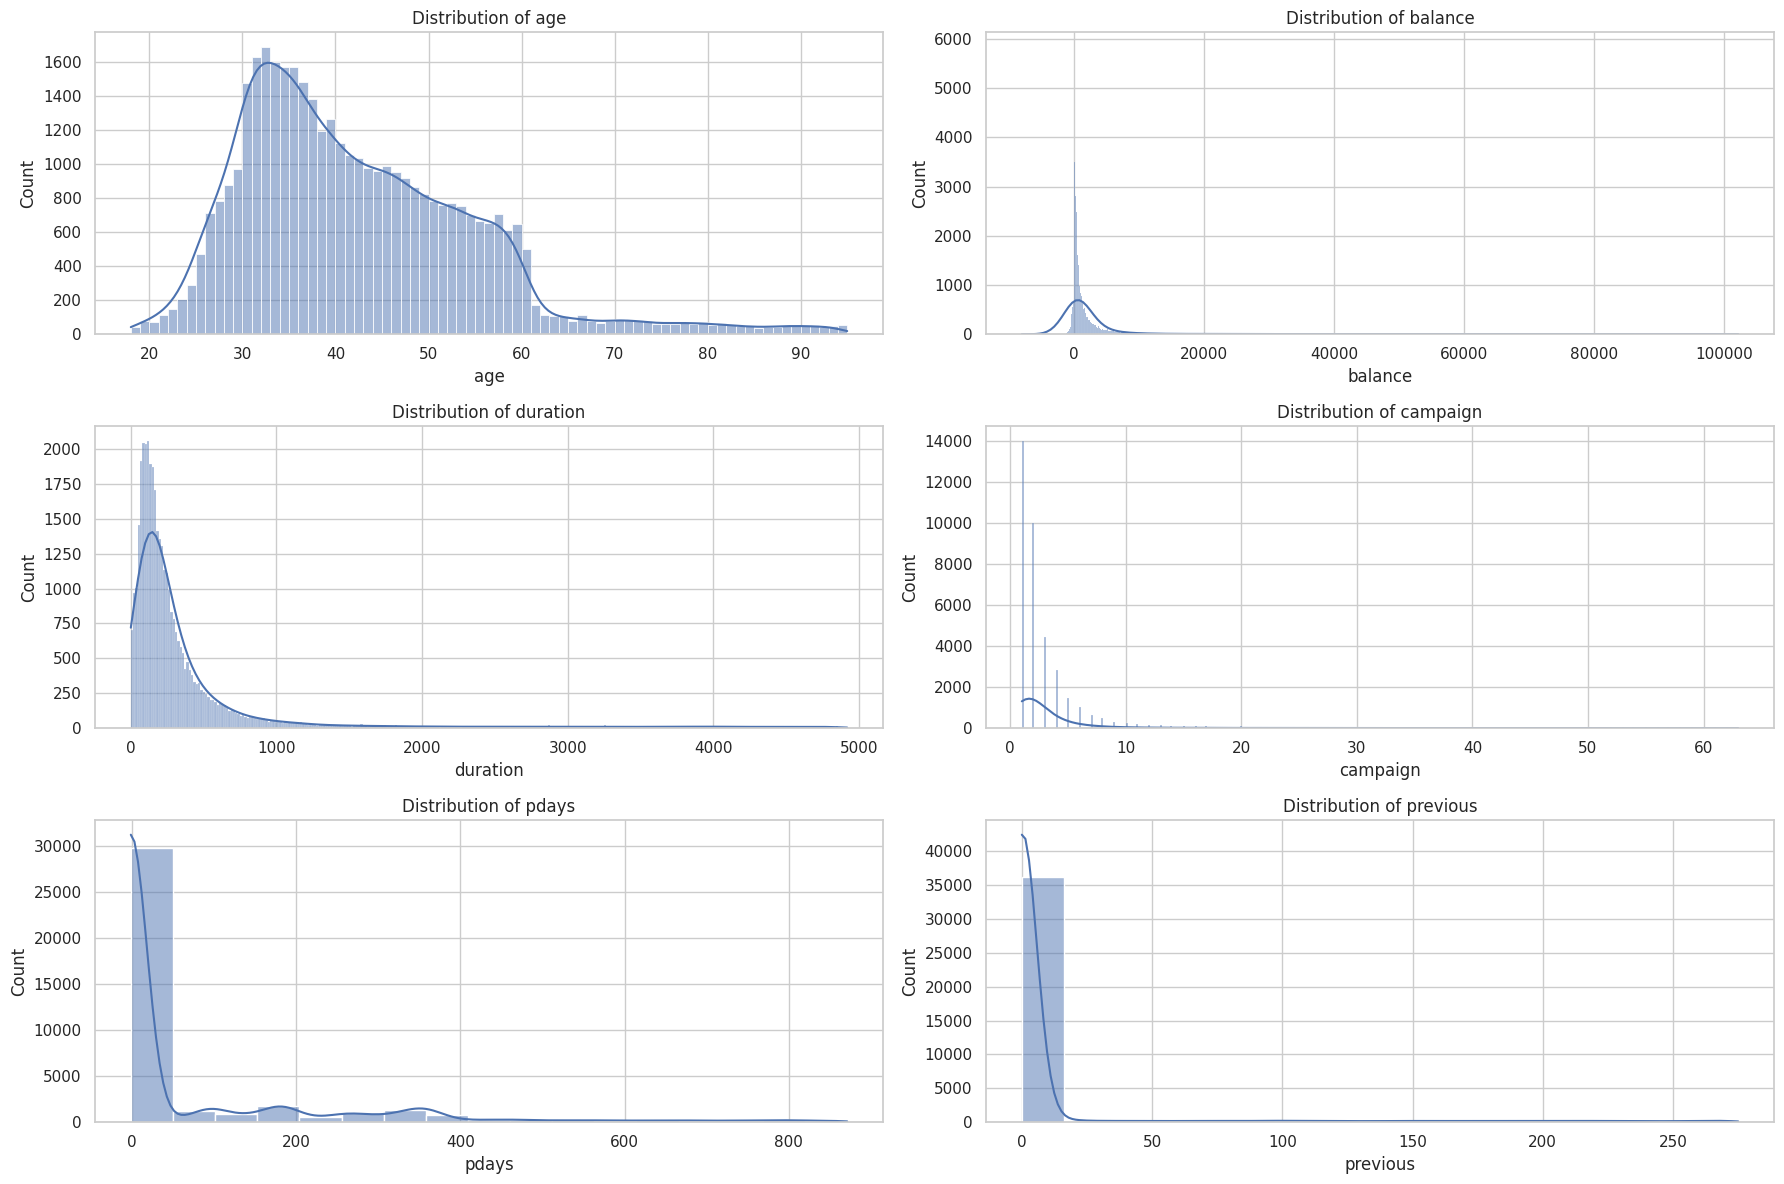

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore')

# List of numerical columns
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Set plot style
sns.set(style="whitegrid")

# Plot distributions
fig, axs = plt.subplots(3, 2, figsize=(18, 12))
for i, col in enumerate(num_cols):
    sns.histplot(train_data[col], kde=True, ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {col}')
    axs[i//2, i%2].set_xlabel(col)

plt.tight_layout()
plt.show()

### 4. Target Variable Distribution:

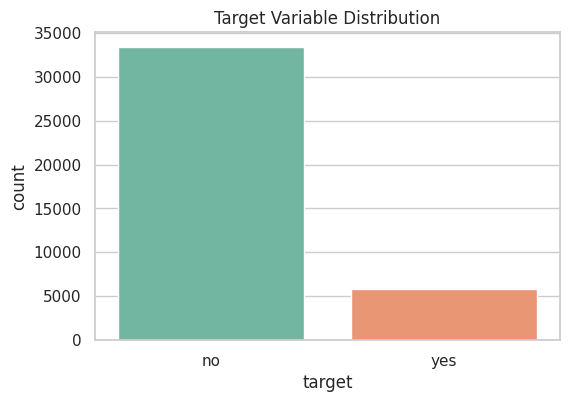

In [34]:
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_data, palette='Set2')
plt.title('Target Variable Distribution')
plt.show()


### 4. Correlation Matrix:

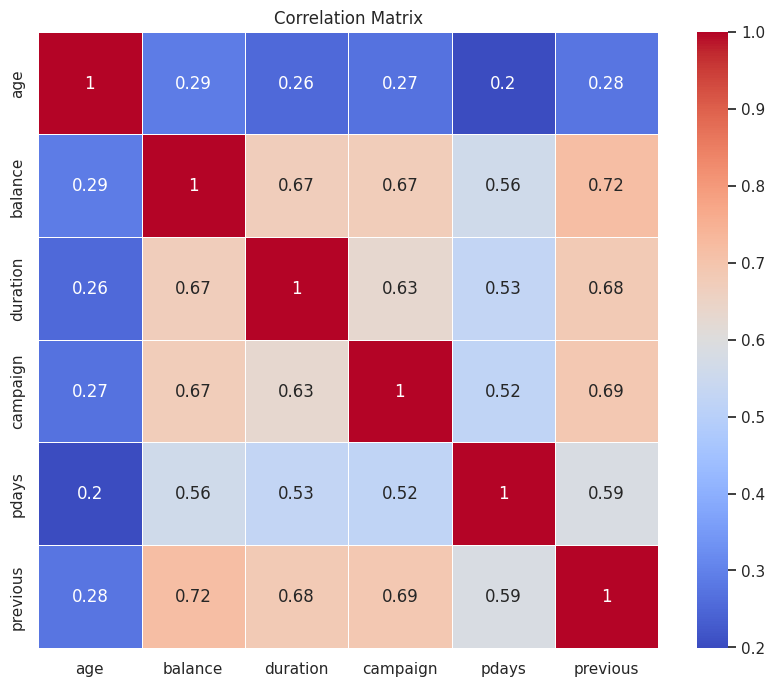

In [35]:
# Drop the non-numeric columns or convert them to numeric
numeric_df = train_data.select_dtypes(include=[np.number])

# If you want to convert categorical columns to numeric using one-hot encoding:
# numeric_df = pd.get_dummies(train_df, drop_first=True)

# Correlation matrix for numerical columns
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### 5.  Understanding Categorical Variables:

In [1]:
# Plot counts of categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

fig, axs = plt.subplots(4, 2, figsize=(18, 18))
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=train_data, palette='Set2', ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title(f'Distribution of {col}')
    axs[i//2, i%2].set_xlabel(col)

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

# Data Cleaning Steps

### 1) Handle Missing Values:

In [37]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

# Example of filling missing values
# train_df['column_name'].fillna(value, inplace=True)

job            229
education     1467
contact      10336
poutcome     29451
dtype: int64


### 2) Remove Duplicates:

Check for and remove any duplicate rows in your dataset.

In [38]:
# Remove duplicates
train_data.drop_duplicates(inplace=True)


### 3) Convert Data Types:

Ensure that each column has the correct data type (e.g., converting categorical variables to 'category' type, converting date strings to datetime, etc.).

In [39]:
# Example of converting a column to datetime
train_data['last contact date'] = pd.to_datetime(train_data['last contact date'])


### 4) Handle Outliers:

Identify and decide how to handle outliers in numerical columns (e.g., removing or capping values).

In [40]:
# Example using IQR method for outlier detection
Q1 = train_data['balance'].quantile(0.25)
Q3 = train_data['balance'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
train_data = train_data[(train_data['balance'] >= (Q1 - 1.5 * IQR)) & (train_data['balance'] <= (Q3 + 1.5 * IQR))]


### 5) Encode Categorical Variables:

Convert categorical variables into numeric format using one-hot encoding or label encoding.

In [41]:
# One-hot encoding
train_data = pd.get_dummies(train_data, drop_first=True)

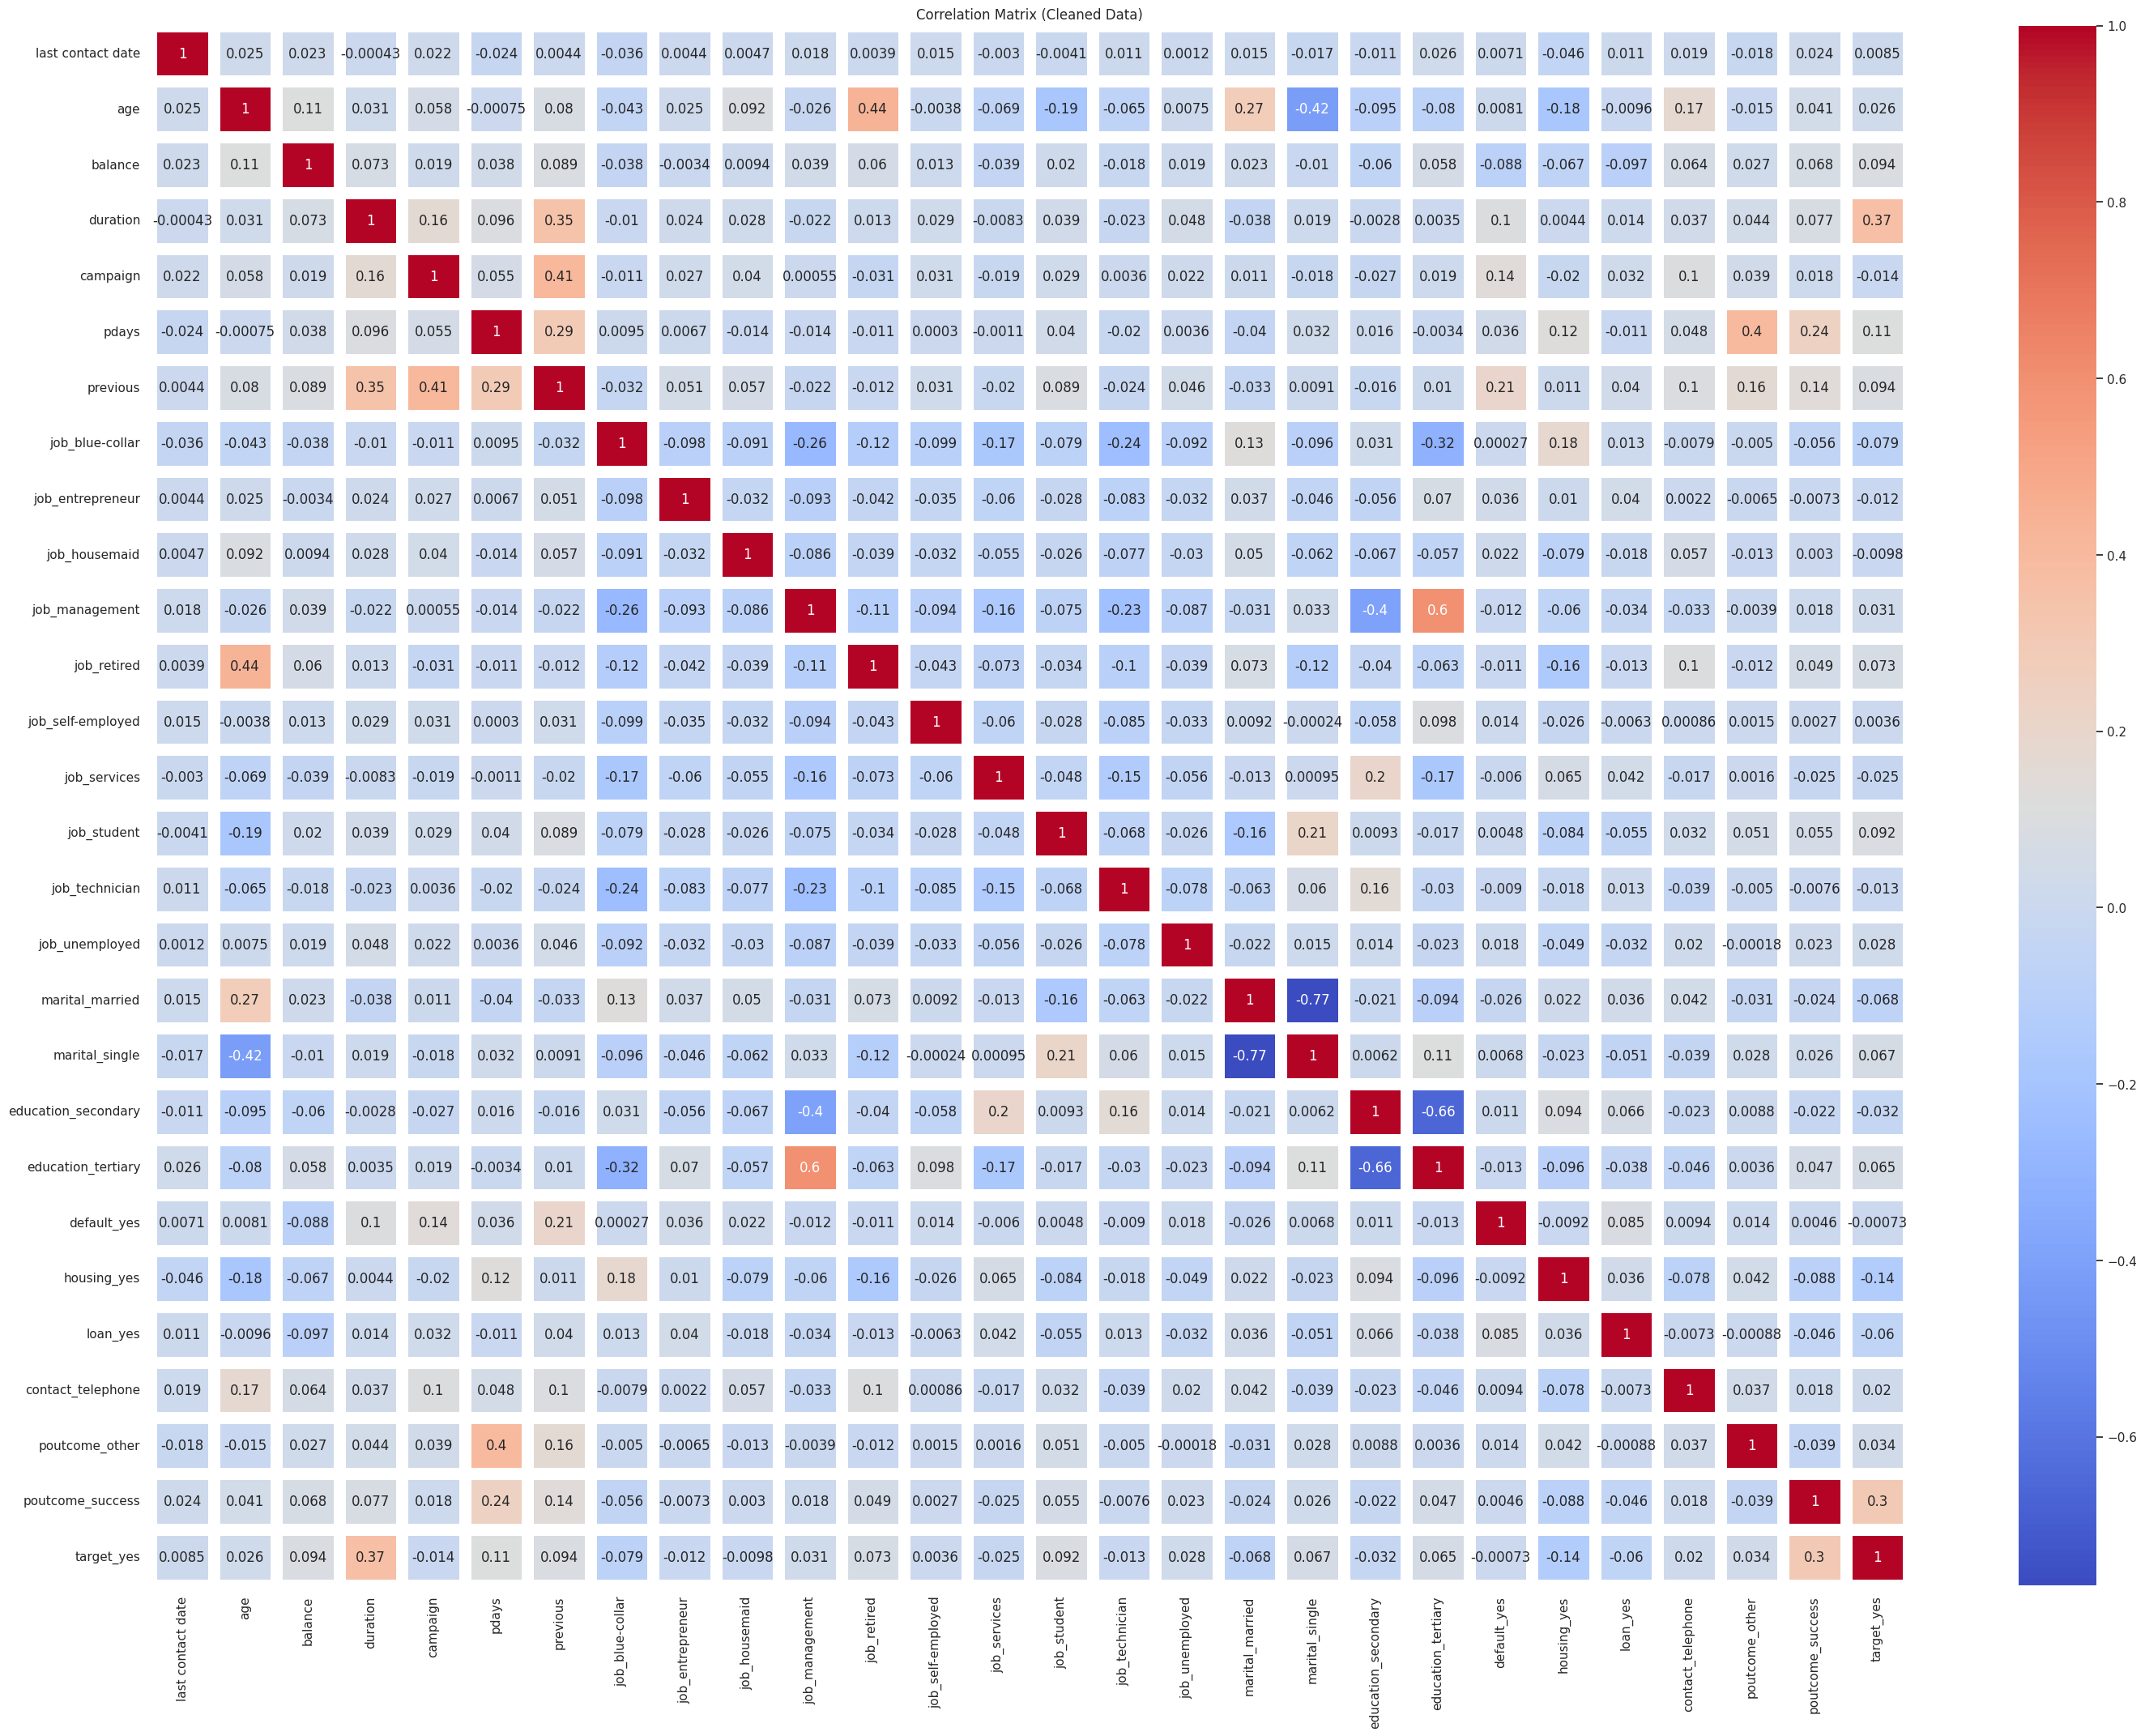

In [25]:
# Correlation Matrix after cleaning
corr_matrix_clean = train_data.corr()

# Plotting heatmap for correlation matrix
plt.figure(figsize=(35, 25))
sns.heatmap(corr_matrix_clean, annot=True, cmap='coolwarm', linewidths=10.5)
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()


In [45]:
# Data Loading (Kaggle-style)
import pandas as pd

# Load the dataset from the Kaggle input directory
train_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv')
test_data = pd.read_csv('/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv')

# Display the first few rows of the training data for inspection
print("First few rows of the training data:")
print(train_data.head())

# Check the shape of the datasets
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


First few rows of the training data:
  last contact date  age           job  marital  education default  balance  \
0        2009-04-17   26   blue-collar  married  secondary      no      647   
1        2009-10-11   52    technician  married  secondary      no      553   
2        2010-11-20   44   blue-collar  married  secondary      no     1397   
3        2009-09-01   33        admin.  married  secondary      no      394   
4        2008-01-29   31  entrepreneur   single   tertiary      no      137   

  housing loan    contact  duration  campaign  pdays  previous poutcome target  
0     yes   no   cellular       357         2    331         1    other     no  
1     yes   no  telephone       160         1     -1         0      NaN     no  
2      no   no   cellular       326         1     -1         0      NaN     no  
3     yes   no  telephone       104         3     -1         0      NaN     no  
4      no   no   cellular       445         2     -1         0      NaN     no  
Tr

In [46]:
import numpy as np

# Checking for missing values in the dataset
missing_values = train_data.isnull().sum()
print("Missing values in training data:\n", missing_values)

# Getting summary statistics for numerical columns
summary_stats = train_data.describe()
print("\nSummary statistics for numerical columns:\n", summary_stats)

# Checking data types of columns
data_types = train_data.dtypes
print("\nData types of columns:\n", data_types)



Missing values in training data:
 last contact date        0
age                      0
job                    229
marital                  0
education             1467
default                  0
balance                  0
housing                  0
loan                     0
contact              10336
duration                 0
campaign                 0
pdays                    0
previous                 0
poutcome             29451
target                   0
dtype: int64

Summary statistics for numerical columns:
                 age        balance      duration      campaign         pdays  \
count  39211.000000   39211.000000  39211.000000  39211.000000  39211.000000   
mean      42.120247    5441.781719    439.062789      5.108770     72.256051   
std       12.709352   16365.292065    769.096291      9.890153    160.942593   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      98.000000    109.000000      1.000000     -1.000000 

In [47]:
print(train_data.columns)


Index(['last contact date', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')


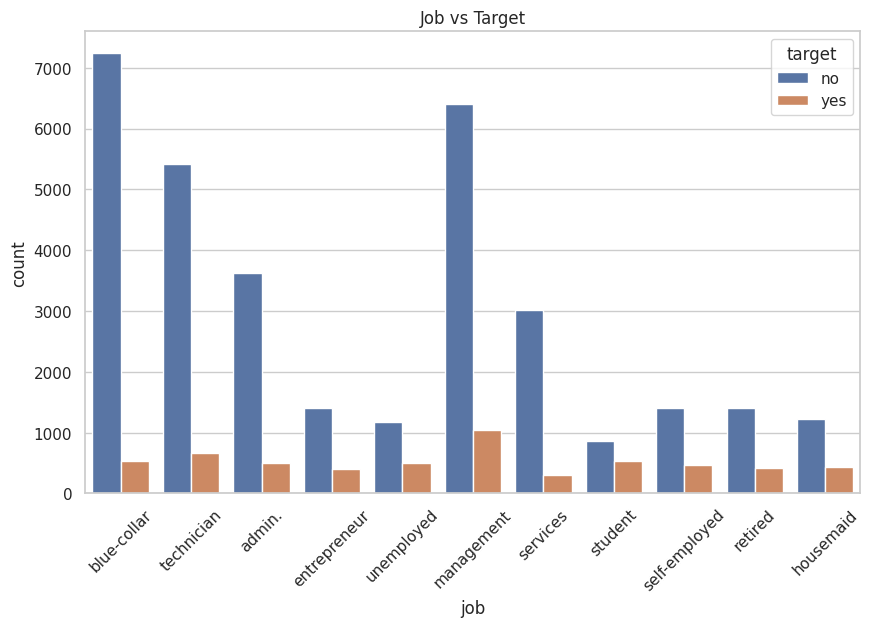

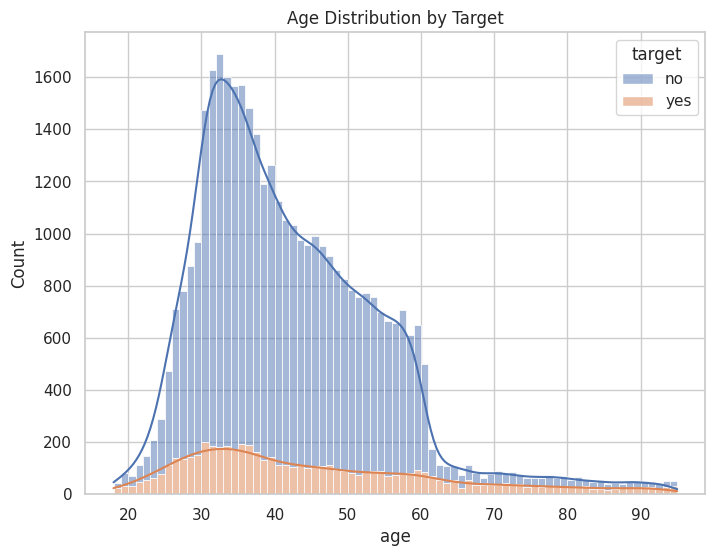

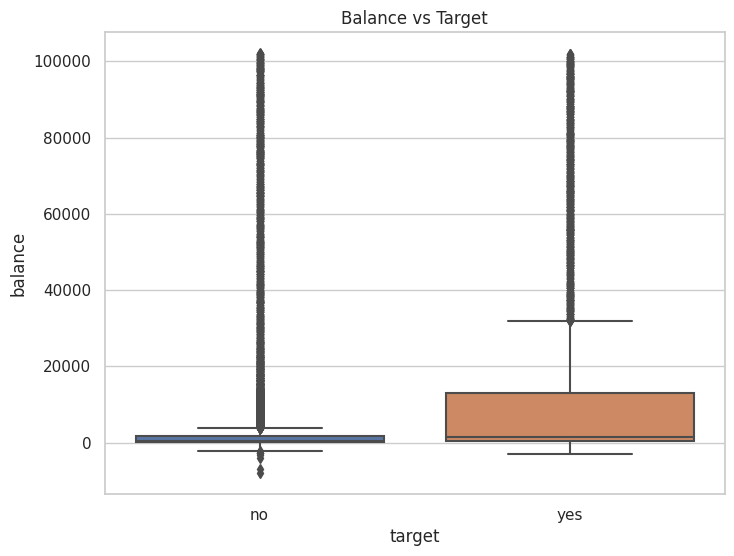

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')


# Job distribution with target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='job', hue='target')
plt.title('Job vs Target')
plt.xticks(rotation=45)
plt.show()

# Age distribution with target variable
plt.figure(figsize=(8, 6))
sns.histplot(train_data, x='age', hue='target', multiple="stack", kde=True)
plt.title('Age Distribution by Target')
plt.show()

# Balance distribution with target variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_data, x='target', y='balance')
plt.title('Balance vs Target')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split

# Prepare the data for model building
X = train_data.drop(columns=['target', 'last contact date'])  # Drop unnecessary columns
y = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)  # Encode target as 1 for 'yes' and 0 for 'no'

# Split the data into training and validation sets (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)


Training set shape: (31368, 14)
Validation set shape: (7843, 14)


In [50]:
# One-hot encoding of categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

# Apply one-hot encoding to the training set
X_train_encoded = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)

# Apply one-hot encoding to the validation set (ensure consistent columns)
X_val_encoded = pd.get_dummies(X_val, columns=categorical_columns, drop_first=True)

# Ensure both training and validation sets have the same columns
X_val_encoded = X_val_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

print("Shape of encoded training set:", X_train_encoded.shape)
print("Shape of encoded validation set:", X_val_encoded.shape)


Shape of encoded training set: (31368, 26)
Shape of encoded validation set: (7843, 26)


# **MACHINE LEARNING MODEL BUILDING**

## LightGBM with Advanced Tuning

In [2]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import f1_score, classification_report
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define categorical and numerical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Convert date-like column to numerical features
if 'last contact date' in train_data.columns:
    train_data['contact_year'] = pd.to_datetime(train_data['last contact date']).dt.year
    train_data['contact_month'] = pd.to_datetime(train_data['last contact date']).dt.month
    train_data['contact_day'] = pd.to_datetime(train_data['last contact date']).dt.day
    train_data['contact_weekday'] = pd.to_datetime(train_data['last contact date']).dt.weekday
    train_data = train_data.drop(columns=['last contact date'])

if 'last contact date' in test_data.columns:
    test_data['contact_year'] = pd.to_datetime(test_data['last contact date']).dt.year
    test_data['contact_month'] = pd.to_datetime(test_data['last contact date']).dt.month
    test_data['contact_day'] = pd.to_datetime(test_data['last contact date']).dt.day
    test_data['contact_weekday'] = pd.to_datetime(test_data['last contact date']).dt.weekday
    test_data = test_data.drop(columns=['last contact date'])

# Prepare the target variable
X = train_data.drop('target', axis=1)
y = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)

# Encode categorical features as integers for LightGBM
for col in categorical_cols:
    X[col] = X[col].astype('category')
    test_data[col] = test_data[col].astype('category')

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# PCA 
# Define LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42, class_weight='balanced',force_row_wise=True,verbose = -1)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 50, 70, 100],
    'max_depth': [-1, 6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Perform RandomizedSearchCV for parameter tuning
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='f1',
    cv=3,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

In [4]:
# Fit the model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=LGBMClassifier(class_weight='balanced',
                                            force_row_wise=True,
                                            random_state=42, verbose=-1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 6, 10, 15],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [31, 50, 70, 100],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=-1, n_estimators=500, num_leaves=100, subsample=0.8; total time=  30.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=-1, n_estimators=1000, num_leaves=31, subsample=0.8; total time=  20.9s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=-1, n_estimators=500, num_leaves=100, subsample=0.6; total time=  18.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=15, n_estimators=500, num_leaves=31, subsample=1.0; total time=  13.6s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=-1, n_estimators=1000, num_leaves=31, subsample=1.0; total time=  25.5s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=-1, n_estimators=500, num_leaves=50, subsample=0.8; total time=  12.0s
[CV] END colsample_bytree=1.0, learning_rate=0.05, max_depth=15, n_estimators=500, num_leaves=50, subsample=0.6; total time=  12.9s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=10, n_estimat

In [5]:
# Best estimator
best_lgb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Predict on validation set
y_val_pred = best_lgb.predict(X_val)

# Evaluate F1 score
f1 = f1_score(y_val, y_val_pred)
print(f"Validation F1 Score with LightGBM: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Predict on test data
test_predictions = best_lgb.predict(test_data)

# Convert numerical predictions back to "yes"/"no"
test_predictions_labels = ['yes' if pred == 1 else 'no' for pred in test_predictions]

# Prepare the submission file
if 'id' in test_data.columns:
    submission = pd.DataFrame({'id': test_data['id'], 'target': test_predictions_labels})
else:
    submission = pd.DataFrame({'id': test_data.index, 'target': test_predictions_labels})

# Save the submission file
submission.to_csv('submission.csv', index=False)

# Output sample of the submission
print(submission.head())

Best Parameters: {'subsample': 0.6, 'num_leaves': 70, 'n_estimators': 1000, 'max_depth': -1, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Validation F1 Score with LightGBM: 0.6306

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.84      0.90      6677
           1       0.49      0.88      0.63      1166

    accuracy                           0.85      7843
   macro avg       0.73      0.86      0.77      7843
weighted avg       0.90      0.85      0.86      7843

   id target
0   0     no
1   1     no
2   2     no
3   3     no
4   4    yes


### 

## XGBoost

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, classification_report
import xgboost as xgb

In [3]:
# Define numeric and categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Split data into features (X) and target (y)
X = train_data.drop('target', axis=1)
y = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Preprocess the features
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_val_preprocessed = preprocessor.transform(X_val)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_preprocessed, label=y_train)
dval = xgb.DMatrix(X_val_preprocessed, label=y_val)

# Define XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'scale_pos_weight': sum(y_train == 0) / sum(y_train == 1),
    'seed': 42
}

In [4]:
# Train the model with early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=10
)

[0]	train-logloss:0.67052	eval-logloss:0.67075
[10]	train-logloss:0.53755	eval-logloss:0.53969
[20]	train-logloss:0.47398	eval-logloss:0.47871
[30]	train-logloss:0.43870	eval-logloss:0.44551
[40]	train-logloss:0.41622	eval-logloss:0.42527
[50]	train-logloss:0.40230	eval-logloss:0.41441
[60]	train-logloss:0.39410	eval-logloss:0.40861
[70]	train-logloss:0.38777	eval-logloss:0.40478
[80]	train-logloss:0.38207	eval-logloss:0.40130
[90]	train-logloss:0.37703	eval-logloss:0.39862
[100]	train-logloss:0.37303	eval-logloss:0.39676
[110]	train-logloss:0.36809	eval-logloss:0.39449
[120]	train-logloss:0.36551	eval-logloss:0.39350
[130]	train-logloss:0.36236	eval-logloss:0.39246
[140]	train-logloss:0.35898	eval-logloss:0.39100
[150]	train-logloss:0.35607	eval-logloss:0.39026
[160]	train-logloss:0.35313	eval-logloss:0.38979
[170]	train-logloss:0.35024	eval-logloss:0.38895
[180]	train-logloss:0.34667	eval-logloss:0.38776
[190]	train-logloss:0.34360	eval-logloss:0.38669
[200]	train-logloss:0.34155	eva

In [5]:
# Predict on validation set
y_val_pred = (xgb_model.predict(dval) > 0.5).astype(int)

# F1 score evaluation
f1 = f1_score(y_val, y_val_pred)
print(f"Validation F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Preprocess test data
dtest = xgb.DMatrix(preprocessor.transform(test_data))

# Predict on the test set
test_predictions = (xgb_model.predict(dtest) > 0.5).astype(int)

# Convert numerical predictions back to "yes"/"no"
test_predictions_labels = ['yes' if pred == 1 else 'no' for pred in test_predictions]

# Prepare submission file
if 'id' in test_data.columns:
    submission = pd.DataFrame({
        'id': test_data['id'],
        'target': test_predictions_labels
    })
else:
    submission = pd.DataFrame({
        'id': test_data.index,
        'target': test_predictions_labels
    })

# Save the submission file
# submission.to_csv('submission.csv', index=False)

# Output sample of the submission for validation
print(submission.head())

Validation F1 Score: 0.5784

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      6677
           1       0.47      0.76      0.58      1166

    accuracy                           0.84      7843
   macro avg       0.71      0.80      0.74      7843
weighted avg       0.88      0.84      0.85      7843

   id target
0   0     no
1   1     no
2   2     no
3   3     no
4   4    yes


## Random Forest

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [7]:
# Drop 'last contact date' column from both datasets
train_data = train_data.drop(columns=['last contact date'])
test_data = test_data.drop(columns=['last contact date'])

In [8]:
# Handle missing values
categorical_cols = train_data.select_dtypes(include=['object']).columns.drop('target')
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# Impute categorical columns with most frequent values
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_cols] = cat_imputer.fit_transform(train_data[categorical_cols])
test_data[categorical_cols] = cat_imputer.transform(test_data[categorical_cols])

# Impute numeric columns with mean values
num_imputer = SimpleImputer(strategy='mean')
train_data[numeric_cols] = num_imputer.fit_transform(train_data[numeric_cols])
test_data[numeric_cols] = num_imputer.transform(test_data[numeric_cols])

# Use OneHotEncoder to handle categorical features, ignoring unknown categories in test data
one_hot_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
train_encoded = one_hot_encoder.fit_transform(train_data[categorical_cols])
test_encoded = one_hot_encoder.transform(test_data[categorical_cols])

# Convert encoded arrays back to DataFrames
train_encoded_df = pd.DataFrame(train_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))
test_encoded_df = pd.DataFrame(test_encoded, columns=one_hot_encoder.get_feature_names_out(categorical_cols))

# Concatenate the encoded categorical columns back with the original numeric columns
train_data = pd.concat([train_data.drop(columns=categorical_cols), train_encoded_df], axis=1)
test_data = pd.concat([test_data.drop(columns=categorical_cols), test_encoded_df], axis=1)

In [9]:
# Prepare features and target for model training
X = train_data.drop(columns=['target'])
y = train_data['target'].apply(lambda x: 1 if x == 'yes' else 0)  # Assuming binary target as 'yes' and 'no'

# Split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simplified hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']  # No 'None' to avoid issues
}

# Initialize Random Forest model with balanced class weights
rf_model_tuned = RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1)

# Set up RandomizedSearchCV with a smaller n_iter
random_search = RandomizedSearchCV(
    estimator=rf_model_tuned, 
    param_distributions=param_grid, 
    n_iter=10,  # Reduced from 20
    scoring='f1', 
    cv=3, 
    random_state=42, 
    n_jobs=-1
)

In [11]:
# Fit the randomized search on training data
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 300]},
                   random_state=42, scoring='f1')

In [13]:
# Get the best estimator and evaluate on validation set
best_rf_model = random_search.best_estimator_
y_val_pred_tuned = best_rf_model.predict(X_val)

# Calculate F1 score on validation set
f1_tuned = f1_score(y_val, y_val_pred_tuned)
print("Best F1 Score:", f1_tuned)
print("Best Parameters:", random_search.best_params_)

# Make predictions on the test dataset
# Use the best model to predict on the test data
test_predictions = best_rf_model.predict(test_data)

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


# Create the output DataFrame with index and predictions
output_df = pd.DataFrame({'id': test_data.index, 'target': test_predictions})

# Convert predictions back to original labels ('yes' or 'no')
output_df['target'] = output_df['target'].apply(lambda x: 'yes' if x == 1 else 'no')

# Save to CSV
# output_df.to_csv('submission.csv', index=False)

Best F1 Score: 0.5895249695493301
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      6645
           1       0.14      0.23      0.18      1198

    accuracy                           0.68      7843
   macro avg       0.49      0.49      0.49      7843
weighted avg       0.74      0.68      0.70      7843

